# Simulaciones de imágenes de redes porosas - Parte 05

## Red hexagonal

Hasta ahora, hemos logrado realizar simulaciones de redes cuadradas con poros circulares y varios grados de desorden y ruido.

En este cuaderno, nos focalizaremos en **generar una red de orden hexagonal**.

In [1]:
# Registro:
import datetime
print(f"Cuaderno corrido por última vez en: {datetime.datetime.now()}")

Cuaderno corrido por última vez en: 2025-07-16 14:52:07.981896


### Tarea:

Crear una función que genere una matriz de tamaño arbitrario $M \times N$ (en píxeles), **con orden hexagonal** y poros circulares. Por hexagonal, se entiende que los poros (antes de las distorsiones) estarán distribuidos en un arreglo triangular, formando triángulos equiláteros, y cada poro tendrá seis primeros vecinos a la misma distancia. Ver https://en.wikipedia.org/wiki/Hexagonal_lattice para más información.

La función debe incorporar mínimamente los siguientes **parámetros**:

- {M}: Número de píxeles en dirección X (filas) [píxeles].
- {N}: Número de píxeles en dirección Y (columnas) [píxeles].
- {c}: Distancia fija entre poros más cercanos [píxeles].
- {r}: Radio del poro circular, o lado del poro cuadrado [píxeles].
- {forma}: Forma del poro, mínimamente debe haber opciones para círculo o cuadrado.
- **{orden_red}: Orden de la red cristalina, mínimamente debe haber opciones para red cuadrada o hexagonal.**
- {seed}: Semilla para iniciación aleatoria de la matriz.
- {d_desorden} (integer): Variación aleatoria máxima para el lado de cada poro, en [píxeles]. Tener en cuenta que un poro debe tener como mínimo un píxel de lado.
- {c_desorden} (integer): Variación aleatoria máxima para la distancia entre primeros vecinos, en [píxeles]. Tener en cuenta que esta distancia debe ser como mínimo un píxel.
- {ruido} (numérico): Parámetro para generar ruido aleatorio en cada píxel de la matriz.
- {save_path} [string]: Directorio para guardar la imagen generada.

La función debe tener **controles de parámetros** que devuelvan un error si los valores de entrada son incorrectos, y/o que corrijan automáticamente los parámetros que exceden ciertos límites.

Por otro lado, **la función debe permitir guardar la matriz generada como una imagen .jpg**. La imagen debe cumplir los siguientes requisitos:

- Estar en escala de grises, es decir tener un único canal (las imágenes a color tienen 3 canales: RGB).
- Tener valores de píxel entre 0, representando el vacío, y 255, representado el material sólido.
- El nombre del archivo debe mencionar los parámetros {M, N, c, r, forma, orden_red, seed, d_desorden, c_desorden, ruido, P}. El parámetro P es la porosidad de la muestra, que definimos como:

$$P=1-\frac{\text{Suma de píxeles}}{255 \times N \times M}$$

Un valor $P=0$ representa un molde sin huecos, mientras que $P=1$ significa un model sin material.

In [1]:
import numpy as np
import sims_helper as sh

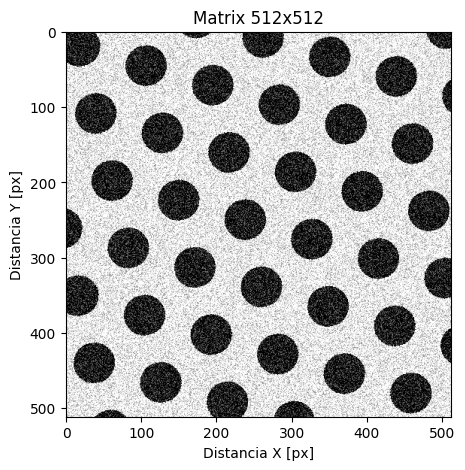

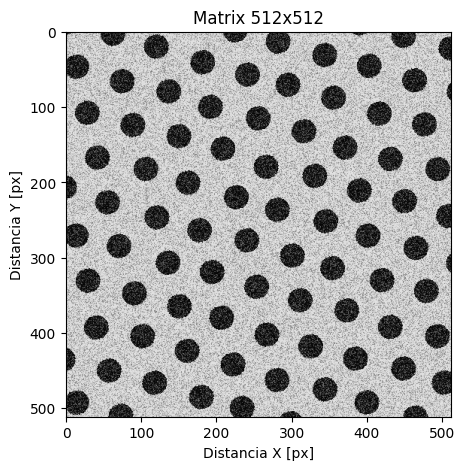

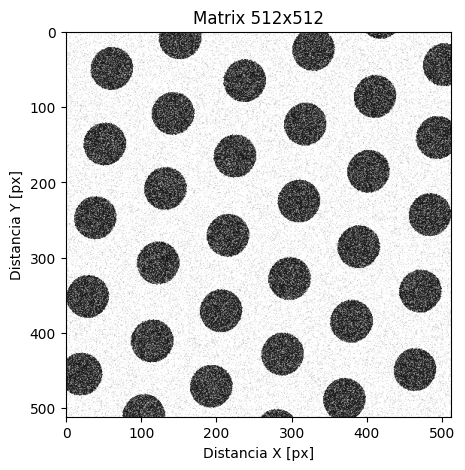

In [11]:
# Preparar parámetros default para generar matriz AAO:
M, N = 512, 512 # Tamaño MxN de la matriz AAO.
forma = 'circ' # Forma del poro, 'cuad' para cuadrado, 'circ' para círculo.
orden_red = 'hexa' #Orden de la red cristalina, 'cuad' para cuadrada, 'hexa' para hexagonal.
seed = None # Semilla aleatoria.
save_path = None #'./' # Directorio para guardar la matriz.
N_imagenes = 3 # Número de imagenes a generar.

for i in range(0,N_imagenes):
    # Generar parámetros aleatorios:
    r = np.random.randint(15,30) # Radio promedio de los poros [píxeles].
    r_desorden = int(np.random.uniform(0, r*0.1)) # Variación aleatoria máxima del radio {r} [píxeles].
    rot_deg = np.random.uniform(0,60) # Ángulo de rotación de la red [grados].
    dcc = np.random.randint(3*r,4*r) # Distancia centro a centro promedio de los poros [píxeles].
    dcc_desorden = int(np.random.uniform(0, dcc*0.1)) # Variación aleatoria máxima de la distancia {dcc} [píxeles].
    B = np.random.randint(-30,30) # Brillo.
    C = np.random.uniform(0.7, 1.3) # Contraste.
    orden_bc = np.random.choice(['CB','BC']) # aplica el brillo y contraste.
    ruido = 1 # Ruido aleatorio (comparable con la escala 0-1 de la matriz AAO).

    # Generar matriz AAO:
    AAO = sh.crear_AAO(M,N,r=r,dcc=dcc,ruido=ruido,rot_deg=rot_deg,seed=seed,forma=forma,orden_red=orden_red,
                r_desorden=r_desorden,dcc_desorden=dcc_desorden,
                save_path=save_path)
    AAO = sh.asigna_brillo_contraste(AAO=AAO, orden_bc=orden_bc, B=B, C=C)
    # Mostrar AAO:
    sh.mostrar_AAO(AAO,figsize=(5,5)) 

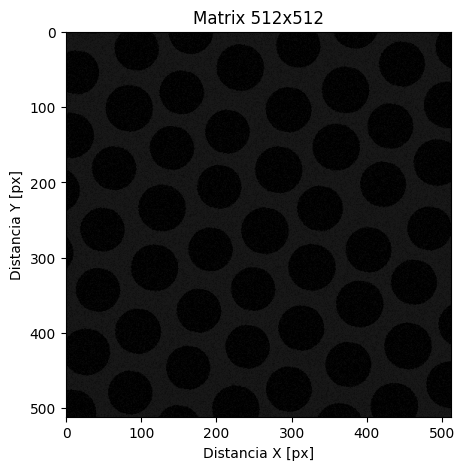

In [3]:
# Preparar parámetros para generar matriz AAO:
M, N = 512, 512 # Tamaño MxN de la matriz AAO.
forma = 'circ' # Forma del poro, 'cuad' para cuadrado, 'circ' para círculo.
orden_red = 'hexa' #Orden de la red cristalina, 'cuad' para cuadrada, 'hexa' para hexagonal.
r = 30 # Radio promedio de los poros [píxeles].
rot_deg = -10 # Ángulo de rotación de la red [grados].
r_desorden = int(r*0.05) # Variación aleatoria máxima del radio {r} [píxeles].
dcc = 80 # Distancia mínima entre centros de poros vecinos [píxeles].
dcc_desorden = int(dcc*0.05) # Variación aleatoria máxima de la distancia {dcc} [píxeles].
ruido = 1 # Ruido aleatorio (comparable con la escala 0-1 de la matriz AAO).
seed = None # Semilla aleatoria.
save_path = None #'./' # Directorio para guardar la matriz.

# Generar matriz AAO:
AAO = sh.crear_AAO(M,N,r=r,dcc=dcc,ruido=ruido,rot_deg=rot_deg,seed=seed,forma=forma,orden_red=orden_red,
                r_desorden=r_desorden,dcc_desorden=dcc_desorden,
                save_path=save_path)

# Modificar el brillo y el contraste en AAO:
B = 0 # Brillo.
C = 0.1   # Contraste.
orden_bc = 'CB' # Orden en el que se aplica el brillo/contraste.
AAO = sh.asigna_brillo_contraste(AAO=AAO, orden_bc=orden_bc, B=B, C=C)

# Mostrar AAO:
sh.mostrar_AAO(AAO,figsize=(5,5))


⚠️ Warning: Poros potencialmente solapados. Reducir r_desorden o dcc_desorden.


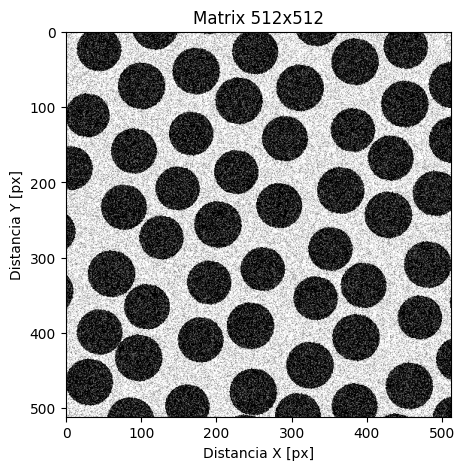

In [4]:
# Preparar parámetros para generar matriz AAO:
M, N = 512, 512 # Tamaño MxN de la matriz AAO.
forma = 'circ' # Forma del poro, 'cuad' para cuadrado, 'circ' para círculo.
orden_red = 'hexa' #Orden de la red cristalina, 'cuad' para cuadrada, 'hexa' para hexagonal.
r = 30 # Radio promedio de los poros [píxeles].
rot_deg = -10 # Ángulo de rotación de la red [grados].
r_desorden = int(r*0.05) # Variación aleatoria máxima del radio {r} [píxeles].
dcc = 80 # Distancia mínima entre centros de poros vecinos [píxeles].
dcc_desorden = 2.5*int(dcc*0.05) # Variación aleatoria máxima de la distancia {dcc} [píxeles].
ruido = 1 # Ruido aleatorio (comparable con la escala 0-1 de la matriz AAO).
seed = None # Semilla aleatoria.
save_path = None #'./' # Directorio para guardar la matriz.

# Generar matriz AAO:
AAO = sh.crear_AAO(M,N,r=r,dcc=dcc,ruido=ruido,rot_deg=rot_deg,seed=seed,forma=forma,orden_red=orden_red,
                r_desorden=r_desorden,dcc_desorden=dcc_desorden,
                save_path=save_path)


# Mostrar AAO:
sh.mostrar_AAO(AAO,figsize=(5,5))

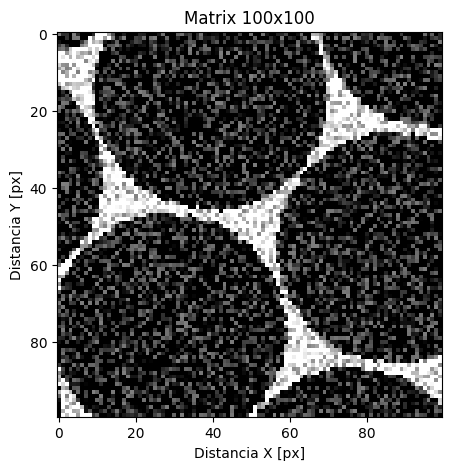

In [5]:
# Preparar parámetros para generar matriz AAO:
M, N = 100, 100 # Tamaño MxN de la matriz AAO.
forma = 'circ' # Forma del poro, 'cuad' para cuadrado, 'circ' para círculo.
orden_red = 'hexa' #Orden de la red cristalina, 'cuad' para cuadrada, 'hexa' para hexagonal.
r = 30 # Radio promedio de los poros [píxeles].
rot_deg = -10 # Ángulo de rotación de la red [grados].
r_desorden = 0*int(r*0.05) # Variación aleatoria máxima del radio {r} [píxeles].
dcc = 29 # Distancia mínima entre centros de poros vecinos [píxeles].
dcc_desorden = 0*int(dcc*0.05) # Variación aleatoria máxima de la distancia {dcc} [píxeles].
ruido = 1 # Ruido aleatorio (comparable con la escala 0-1 de la matriz AAO).
seed = None # Semilla aleatoria.
save_path = None #'./' # Directorio para guardar la matriz.

# Generar matriz AAO:
AAO = sh.crear_AAO(M,N,r=r,dcc=dcc,ruido=ruido,rot_deg=rot_deg,seed=seed,forma=forma,orden_red=orden_red,
                r_desorden=r_desorden,dcc_desorden=dcc_desorden,
                save_path=save_path)


# Mostrar AAO:
sh.mostrar_AAO(AAO,figsize=(5,5))

⚠️ Warning: Poros potencialmente solapados. Reducir r_desorden o dcc_desorden.


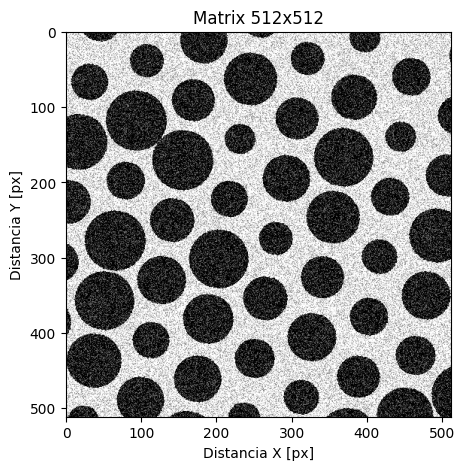

In [7]:
# Preparar parámetros para generar matriz AAO:
M, N = 512, 512 # Tamaño MxN de la matriz AAO.
forma = 'circ' # Forma del poro, 'cuad' para cuadrado, 'circ' para círculo.
orden_red = 'hexa' #Orden de la red cristalina, 'cuad' para cuadrada, 'hexa' para hexagonal.
r = 30 # Radio promedio de los poros [píxeles].
rot_deg = -10 # Ángulo de rotación de la red [grados].
r_desorden = 10*int(r*0.05) # Variación aleatoria máxima del radio {r} [píxeles].
dcc = 80 # Distancia mínima entre centros de poros vecinos [píxeles].
dcc_desorden = 0*int(dcc*0.05) # Variación aleatoria máxima de la distancia {dcc} [píxeles].
ruido = 1 # Ruido aleatorio (comparable con la escala 0-1 de la matriz AAO).
seed = None # Semilla aleatoria.
save_path = None #'./' # Directorio para guardar la matriz.

# Generar matriz AAO:
AAO = sh.crear_AAO(M,N,r=r,dcc=dcc,ruido=ruido,rot_deg=rot_deg,seed=seed,forma=forma,orden_red=orden_red,
                r_desorden=r_desorden,dcc_desorden=dcc_desorden,
                save_path=save_path)


# Mostrar AAO:
sh.mostrar_AAO(AAO,figsize=(5,5))